 ----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<h1><center>
    
Practical exam on Computer Vision: Part I
    
(January, 18th, 2024)
</center></h1>   

Consider the following:

- You can answer in English, Spanish or Catalan. 

- Add title to figures and add sufficient comments on the code to understand it.

- Make sure to print and plot exactly what it is indicated. If a reference image is provided, your output is expected to be exactly the same unless instructed differently. 

- At the end of the exam, upload only your .ipynb file (no need to upload the images)
    
- Make sure your code can be ran by us without errors.

- Use packages and solutions that were covered in your class and tutorials. If you are unsure about using a particular package, you should seek clarification from your instructor to confirm whether it is allowed.

- Please note that partial credit will be given based on the correctness of the code and the logic demonstrated. If certain parts of your code or answers are accurate, even if the final output is not entirely correct, you may still receive points.

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte, img_as_float
from skimage.exposure import histogram

from skimage.filters import gaussian, median
from skimage.transform import resize, rescale

from skimage.color import rgb2gray

from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage.segmentation import slic, quickshift

## Exercise 1

### Greenland's flag

We're right in the middle of winter. The temperatures have dropped to their lowest, and many of us are daydreaming about the hotter days ahead. This seasonal shift draws a parallel to the symbolism embedded in Greenland's flag, where the red circle represents the warmth and hope for brighter days ahead.

**Ex.1** (3 points) Load the image `red_circle.png` from the folder `images` and print it's principal image features: type and shape. Use the image to compose the Greenland's flag, like in the image below.

**Hint**: Use a mask to extract the red circle from the image. Create a new white array with the shape of `red_circle.png` and use it, along with the previous image, to create the result. The color of the circle corresponding to the RGB standard is [255,0,0].

<img src="images/ejercicio1.png" width="515" height="350">

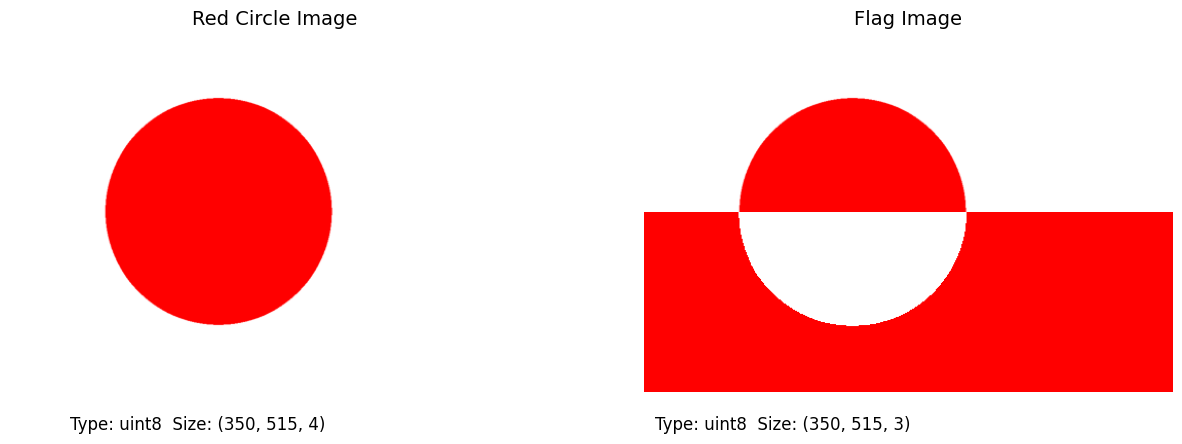

In [15]:
circle_image_path = "images/red_circle.png"

red_circle = io.imread(circle_image_path)

height, width, _ = red_circle.shape
flag = np.zeros((height, width, 3), dtype=np.uint8)
flag[:,:,0] = 255
white_image = np.ones((height, width, 3), dtype=np.uint8) * 255

flag[:flag.shape[0]//2,:,:] = 255
mask_circle = np.any(red_circle[:, :, 0:3] != [255,255,255], axis = 2)
flag[mask_circle,:] = 255

half_circle = red_circle.copy()[:,:,0:3]
flag[:half_circle.shape[0]//2,:,:] = half_circle[:half_circle.shape[0]//2,:,:]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax[0].imshow(red_circle, cmap='gray')
ax[0].axis("off")
ax[0].set_title("Red Circle Image", fontsize=14)

ax[1].imshow(flag, cmap='gray')
ax[1].axis("off")
ax[1].set_title("Flag Image", fontsize=14)

fig.text(0.25, 0.35, "Type: " + str(red_circle.dtype) + "  Size: " + str(red_circle.shape), ha="center", fontsize=12)
fig.text(0.64, 0.35, "Type: " + str(flag.dtype) + "  Size: " + str(flag.shape), ha="center", fontsize=12)

plt.show()

## Exercise 2

### Spring time

At the moment it is still winter in Barcelona. Let's help the change of seasons with an exercise.

**Ex 2.1** (2 points) Read the images `./images/barcelona_nieve.png` and `./images/barcelona_primavera.png` and obtain their low frequency and high frequency counterparts. Visualize them, along with their titles. Apply a low-pass filter using a sigma with value lower_sigma = 5 and a high-pass filter using a sigma with value high_sigma = 10. 

<img src="images/ejercicio21.png" width="515" height="350">

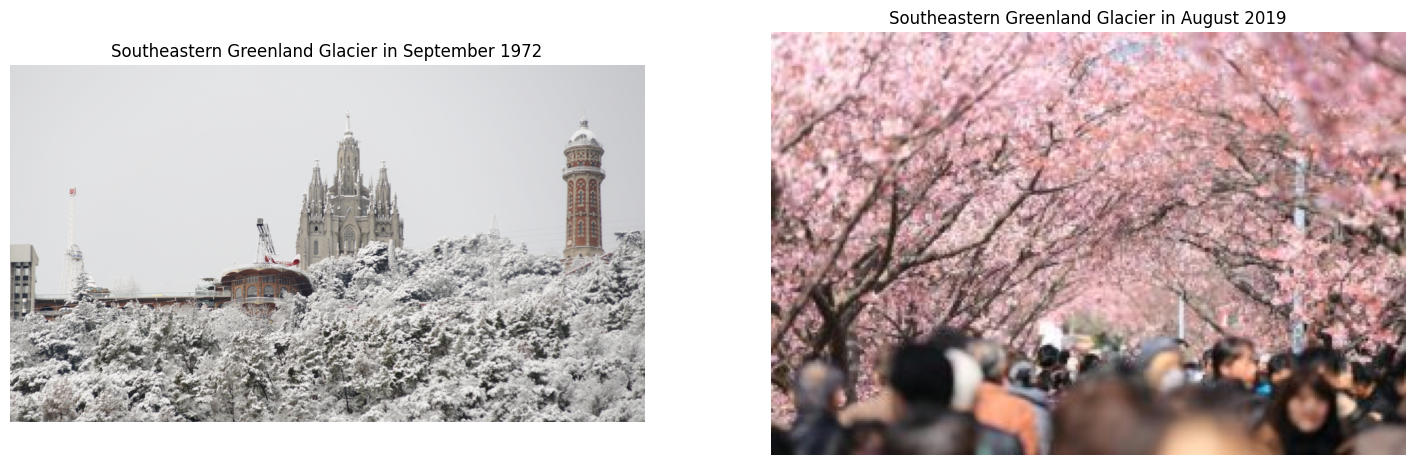

In [4]:
barcelona_nieve = io.imread("images/barcelona_nieve.png")
barcelona_primavera = io.imread("images/barcelona_primavera.jpg")

barcelona_nieve = barcelona_nieve/255.0
barcelona_primavera = barcelona_primavera/255.0

low_sigma = 5
high_sigma = 10

low_pass_barcelona_nieve = gaussian(barcelona_nieve, sigma=low_sigma, channel_axis=-1)
low_pass_barcelona_primavera = gaussian(barcelona_primavera, sigma=low_sigma, channel_axis=-1)

high_sigma_barcelona_nieve = gaussian(barcelona_nieve, sigma = high_sigma, channel_axis=-1)
high_sigma_barcelona_primavera = gaussian(barcelona_primavera, sigma = high_sigma, channel_axis=-1)

high_pass_barcelona_nieve = barcelona_nieve - high_sigma_barcelona_nieve
high_pass_barcelona_primavera = barcelona_primavera - high_sigma_barcelona_primavera

high_pass_barcelona_nieve = np.clip(high_pass_barcelona_nieve, 0, 1)
high_pass_barcelona_primavera = np.clip(high_pass_barcelona_primavera, 0, 1)

fig = plt.figure(figsize=(18, 7))

ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
plt.imshow(barcelona_nieve)
plt.title('Southeastern Greenland Glacier in September 1972')

ax2 = fig.add_subplot(1, 2, 2)
ax2.axis('off')
plt.imshow(barcelona_primavera)
plt.title('Southeastern Greenland Glacier in August 2019')
plt.show()

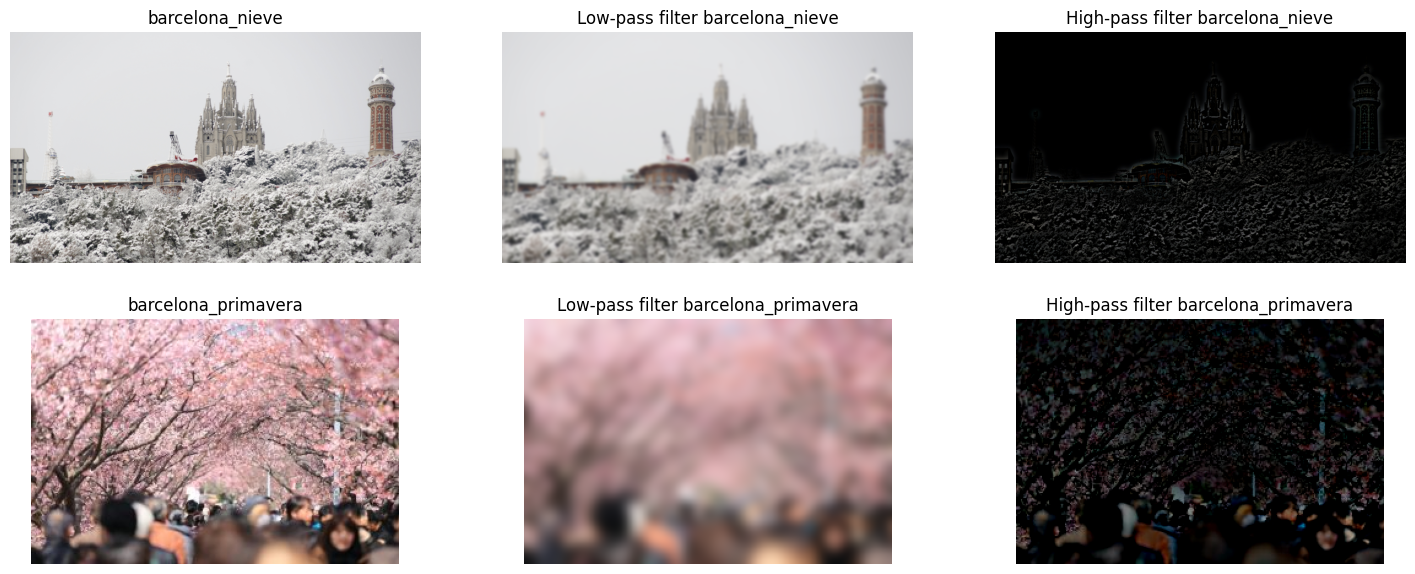

In [5]:
fig=plt.figure(figsize=(18,7))

ax1 = fig.add_subplot(2,3,1)
ax1.axis('off')
plt.imshow(barcelona_nieve)
plt.title('barcelona_nieve')

ax2 = fig.add_subplot(2,3,2)
ax2.axis('off')
plt.imshow(low_pass_barcelona_nieve)
plt.title('Low-pass filter barcelona_nieve')

ax3 = fig.add_subplot(2,3,3)
ax3.axis('off')
plt.imshow(high_pass_barcelona_nieve)
plt.title('High-pass filter barcelona_nieve')

ax4 = fig.add_subplot(2,3,4)
ax4.axis('off')
plt.imshow(barcelona_primavera)
plt.title('barcelona_primavera')

ax5 = fig.add_subplot(2,3,5)
ax5.axis('off')
plt.imshow(low_pass_barcelona_primavera)
plt.title('Low-pass filter barcelona_primavera')

ax6 = fig.add_subplot(2,3,6)
ax6.axis('off')
plt.imshow(high_pass_barcelona_primavera)
plt.title('High-pass filter barcelona_primavera')

plt.show()

**Ex 2.2** (2 points) Use the obtained images to create hybrid images like the ones below.

<img src="images/ejercicio22.png" width="515" height="350">

In [18]:
resized_low_pass_barcelona_primavera = resize(low_pass_barcelona_primavera, barcelona_nieve.shape)
resized_high_pass_barcelona_primavera = resize(high_pass_barcelona_primavera, barcelona_nieve.shape)

resized_low_pass_barcelona_primavera = img_as_ubyte(resized_low_pass_barcelona_primavera)
resized_high_pass_barcelona_primavera = img_as_ubyte(resized_high_pass_barcelona_primavera)

resized_low_pass_barcelona_primavera = resized_low_pass_barcelona_primavera/255
resized_high_pass_barcelona_primavera = resized_high_pass_barcelona_primavera/255

low_barcelona_primavera_high_barcelona_nieve = np.clip(resized_low_pass_barcelona_primavera + high_pass_barcelona_nieve, 0, 1)
low_barcelona_nieve_high_barcelona_primavera =  np.clip(low_pass_barcelona_nieve + resized_high_pass_barcelona_primavera, 0, 1)


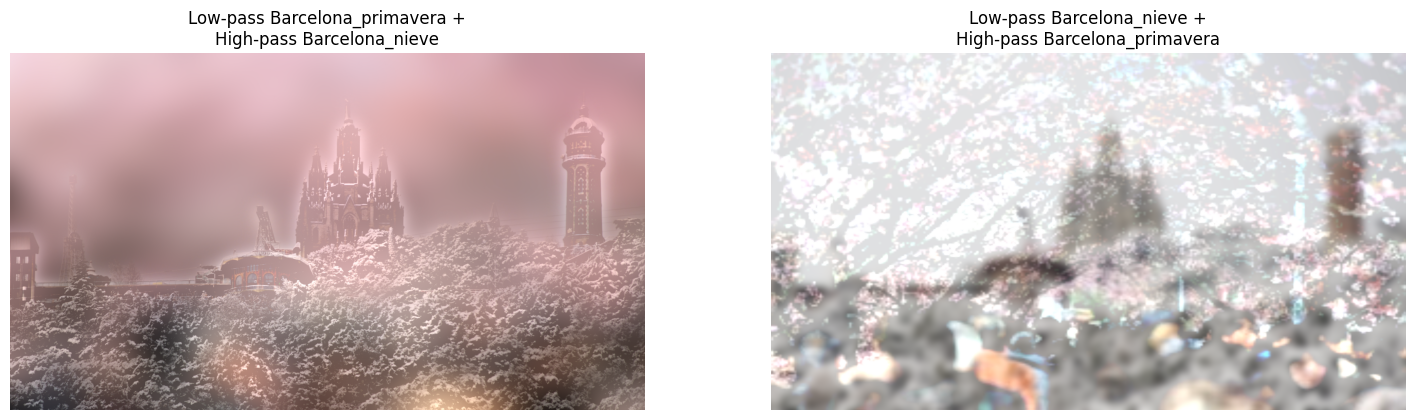

In [19]:
fig = plt.figure(figsize=(18, 7))

ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
plt.imshow(low_barcelona_primavera_high_barcelona_nieve)
plt.title('Low-pass Barcelona_primavera +\nHigh-pass Barcelona_nieve')

ax2 = fig.add_subplot(1, 2, 2)
ax2.axis('off')
plt.imshow(low_barcelona_nieve_high_barcelona_primavera)
plt.title('Low-pass Barcelona_nieve +\nHigh-pass Barcelona_primavera')

plt.show()

## Exercise 3

### Polar ice melting

Now that we have successfully invoked spring in Barcelona, let's redirect our attention to Greenland, where the melting of the polar ice has been a persistent issue for decades. We will analyze the thaw using histograms and examine the paths left by the melting ice.

**Ex.3.1** (0.5 points) Read the images `before_glacier.png` together with the  image `after_glacier.png` from the folder `images`. Rescale the first image to match the shape of the second one. Show both images in one single figure, with their titles, using the `subplots` function.

<img src="images/ejercicio31.png" width="515" height="350">

Text(0.5, 1.0, 'Southeastern Greenland Glacier in August 2019')

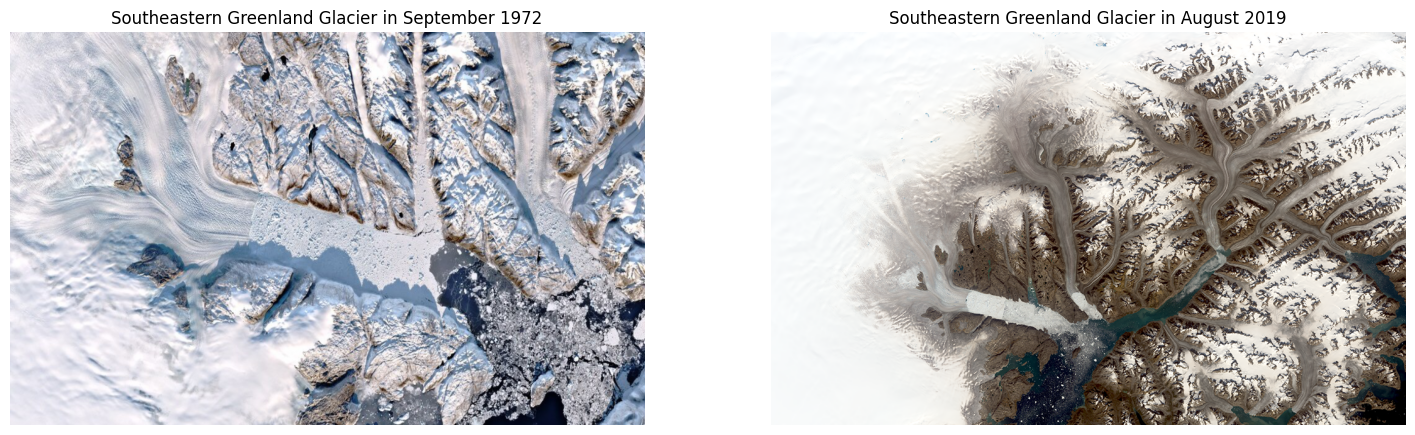

In [7]:
before_glacier = io.imread("images/before_glacier.png")
after_glacier = io.imread("images/after_glacier.png")
before_glacier = resize(before_glacier, after_glacier.shape)

fig=plt.figure(figsize=(18,7))

ax1 = fig.add_subplot(1,2,1)
ax1.axis('off')
plt.imshow(before_glacier, cmap = 'gray')
plt.title('Southeastern Greenland Glacier in September 1972')

ax2 = fig.add_subplot(1,2,2)
ax2.axis('off')
plt.imshow(after_glacier, cmap = 'gray')
plt.title('Southeastern Greenland Glacier in August 2019')

**Ex.3.2** (1 point) Visualize the histogram with 32 bins of the RGB images and grayscale images. Explain the difference between both histograms.

<img src="images/ejercicio32old.png" width="515" height="350">
<img src="images/ejercicio32new.png" width="515" height="350">

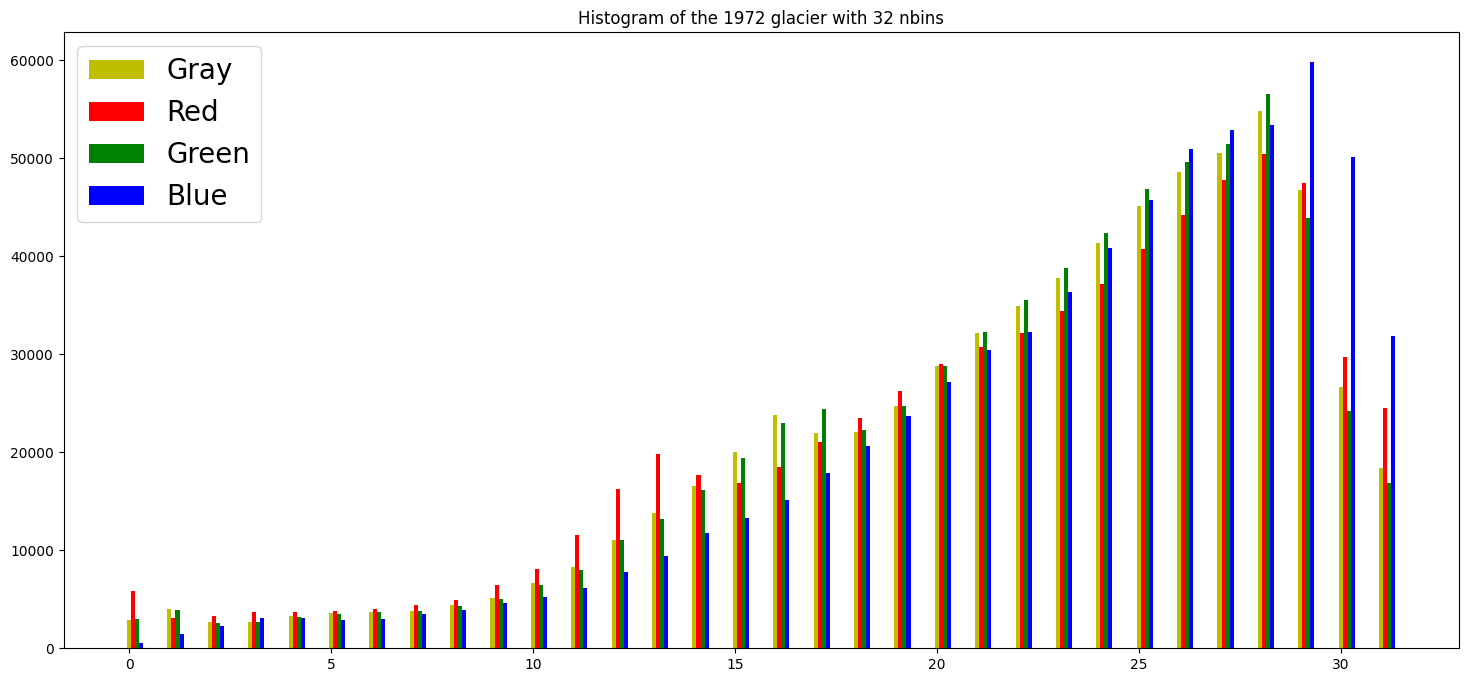

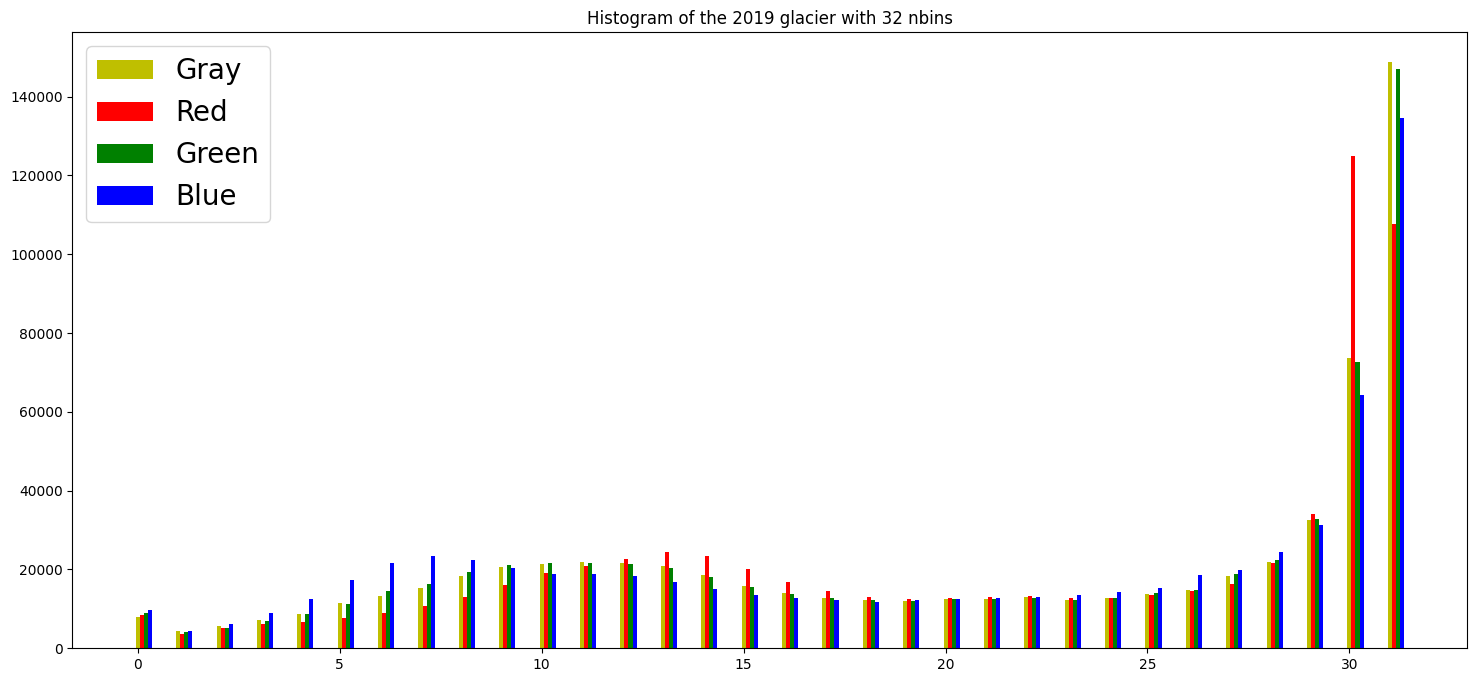

In [8]:
def im_hist(im,  glacier, nbins=8):
    """
    Method that shows the histogram of the 3 channels of the image and its gray versions.
    The methof uses the number of bins passed as a parameter (default 8).
    """
    #Getting the channels of the image converted to float
    red_channel = img_as_float(im[:, :, 0])
    green_channel= img_as_float(im[:, :, 1])
    blue_channel= img_as_float(im[:, :, 2])
    
    #Getting the gray version of the image as float
    gray_image = rgb2gray(im)     

    #Getting the histograms for each image (3 channels and gray image)
    hst_gray, bins_gray = histogram(gray_image, nbins=nbins)
    hst_r, bins_r = histogram(red_channel, nbins=nbins)
    hst_g, bins_g = histogram(green_channel, nbins=nbins)
    hst_b, bins_b = histogram(blue_channel, nbins=nbins)

    ind = np.arange(nbins)
    
    #Creating a figure for the histogram 
    fig = plt.figure(figsize=(18,8))
    
    #Creating bars for every image represented at the histogram
    cl_gray = plt.bar( ind, hst_gray, 0.1, color='y')
    cl_r = plt.bar( ind+.1, hst_r, 0.1, color='r')
    cl_g = plt.bar( ind+.2, hst_g,0.1, color='g')
    cl_b = plt.bar( ind+.3, hst_b,0.1, color='b')
    
    #Adding a legend and title
    plt.legend((cl_gray[0], cl_r[0], cl_g[0], cl_b[0]), ('Gray','Red','Green','Blue'), loc=2, prop={'size': 20})
    plt.title(f'Histogram of the {glacier} with {nbins} nbins')
    
    #Showing the histogram
    plt.show()

#Converting the image to a floating-point representation 
before_glacier_fl = img_as_float(before_glacier) 
after_glacier_fl = img_as_float(after_glacier)    
#Applying the histogram
im_hist(before_glacier_fl, '1972 glacier', 32) #16 bins
im_hist(after_glacier_fl, '2019 glacier', 32) #32 bins

**Ex.3.3** (1.5 points) Apply the Slic and Felzenswalb image segmentation methods to both images.

Use the following sets of parameters:
- Felzenszwalb: scale=300, sigma=2
- Slic: n_segments=100, start_label=1

<img src="images/ejercicio33.png" width="515" height="350">

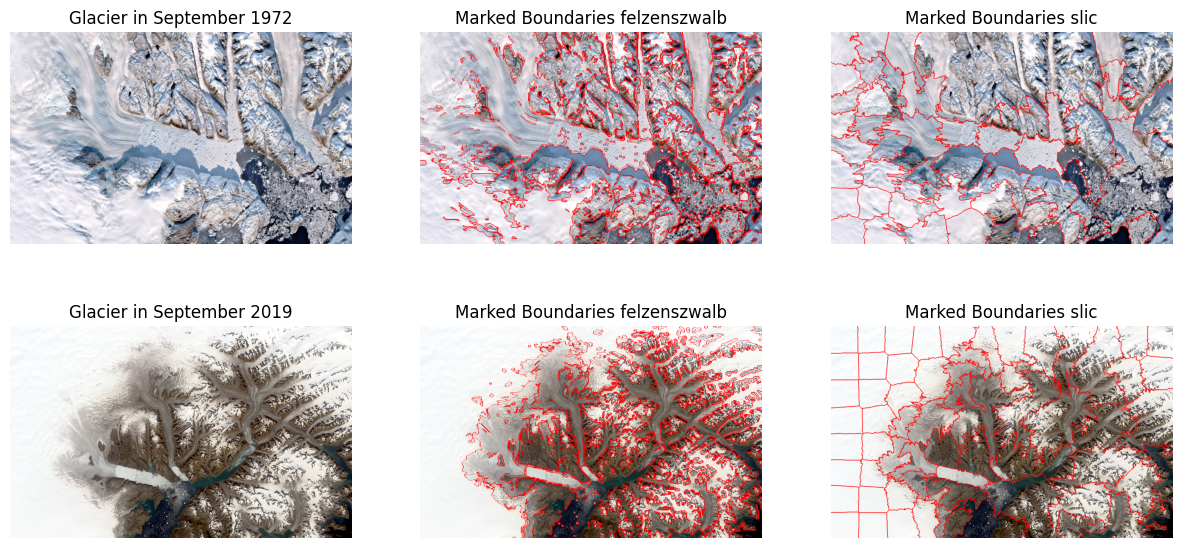

In [9]:
segments_after_glacier_fz = felzenszwalb(after_glacier, scale=300, sigma=2)
segments_before_glacier_fz = felzenszwalb(before_glacier, scale=300, sigma=2)
segments_after_glacier_sl= slic(after_glacier,n_segments=100, start_label=1)
segments_before_glacier_sl= slic(before_glacier,n_segments=100, start_label=1)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))

ax = axs[0,0]
ax.imshow(before_glacier)
ax.axis('off')
ax.set_title('Glacier in September 1972')

ax = axs[0,1]
ax.imshow(mark_boundaries(before_glacier, segments_before_glacier_fz, color=(1,0,0)))
ax.axis('off')
ax.set_title('Marked Boundaries felzenszwalb')

ax = axs[0,2]
ax.imshow(mark_boundaries(before_glacier, segments_before_glacier_sl, color=(1,0,0)))
ax.axis('off')
ax.set_title('Marked Boundaries slic')

ax = axs[1,0]
ax.imshow(after_glacier)
ax.axis('off')
ax.set_title('Glacier in September 2019')

ax = axs[1,1]
ax.imshow(mark_boundaries(after_glacier, segments_after_glacier_fz, color=(1,0,0)))
ax.axis('off')
ax.set_title('Marked Boundaries felzenszwalb')

ax = axs[1,2]
ax.imshow(mark_boundaries(after_glacier, segments_after_glacier_sl, color=(1,0,0)))
ax.axis('off')
ax.set_title('Marked Boundaries slic')

plt.show()

Which method segments better?

In [ ]:
# Your solution

How have the parameters affected the segmentation?

In [ ]:
# Your solution